### Tutorial: From Linear Regression to Multilayer Perceptron

This tutorial will guide you through the progression from a simple linear regression model, using matrix multiplication, to a more complex model—a Multilayer Perceptron (MLP). By the end, you'll understand how both models are implemented and how to transition from the basic linear model to a neural network.

We will be using the following data that has a slight nonlinearity.

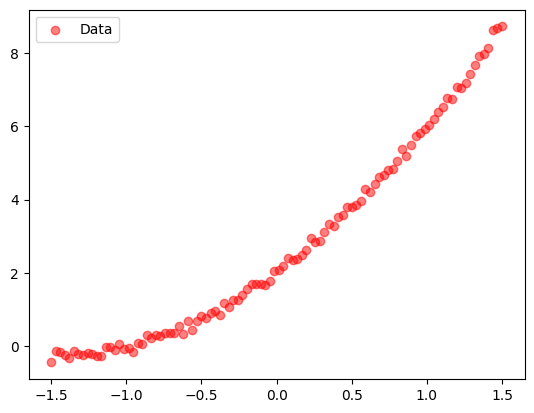

In [ ]:
import matplotlib.pyplot as plt
import jax.numpy as jnp
from jax import random, grad

# Generate synthetic data
key = random.PRNGKey(0)
x = jnp.linspace(-1.5, 1.5, 100).reshape(-1, 1)  # 100 data points, 1 feature
y = 3 * x + 2 # Linear relation
y += random.normal(key, (100, 1)) * 0.1  # Add noise
y +=  x**2 # Add slight nonlinearity

# Plotting the results
plt.scatter(x, y, color='red', alpha=0.5, label='Data')
plt.legend()
plt.show()



#### Part 1: Understanding Linear Regression

**Linear Regression Basics:**
Linear regression is a statistical method that models the relationship between a scalar dependent variable $ \vec{y} $ and one or more independent variables (or features) denoted $ \vec{x} $. The case of one independent variable is called simple linear regression; for more than one, the process is called multiple linear regression.

**Mathematical Model:**
The equation for a linear regression is:
$$ \vec{y} = \mathbf{W} \vec{x} + b $$
where:
- $ \mathbf{W} $ represents the weights matrix.
- $ \vec{x} $ is the vector of input features.
- $ b $ is the bias.

**Matrix Multiplication:**
The heart of linear regression is the matrix multiplication between the weights $ \mathbf{W} $ and the features $ \vec{x} $. This operation scales the input data by the weights to estimate the output.

##### Example of Linear Regression in JAX:


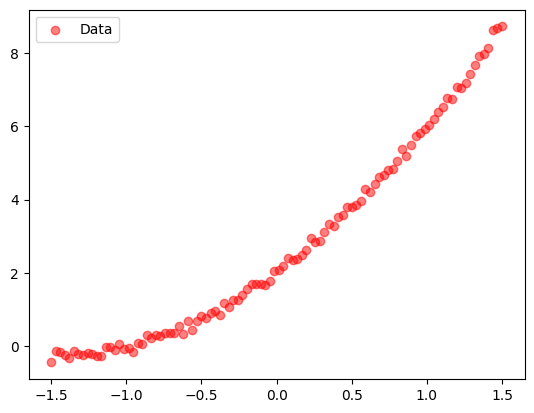

In [ ]:
import matplotlib.pyplot as plt
import jax.numpy as jnp
from jax import random, grad

# Generate synthetic data
key = random.PRNGKey(0)
x = jnp.linspace(-1.5, 1.5, 100).reshape(-1, 1)  # 100 data points, 1 feature
y = 3 * x + 2 # Linear relation
y += random.normal(key, (100, 1)) * 0.1  # Add noise
y +=  x**2 # Add slight nonlinearity

# Plotting the results
plt.scatter(x, y, color='red', alpha=0.5, label='Data')
plt.legend()
plt.show()


In [ ]:
# Initialize parameters
params = {'weights': jnp.array([[1.0]]), 'bias': jnp.array([0.0])}

# Prediction function
def predict(params, x):
    return jnp.dot(x, params['weights']) + params['bias']

# Loss function (Mean Squared Error)
def loss(params, x, y, predictor=predict):
    return jnp.mean((predictor(params, x) - y) ** 2)

# Gradient function
loss_grad = grad(loss)

# Update function
def update(params, x, y, learning_rate=0.1):
    gradients = loss_grad(params, x, y)
    params['weights'] -= learning_rate * gradients['weights']
    params['bias'] -= learning_rate * gradients['bias']
    return params

# Training loop
for _ in range(100):
    params = update(params, x, y)

print("Trained weights and bias:", params['weights'], params['bias'])
y_linear_regression = predict(params, x)

Trained weights and bias: [[3.010272]] [2.773364]


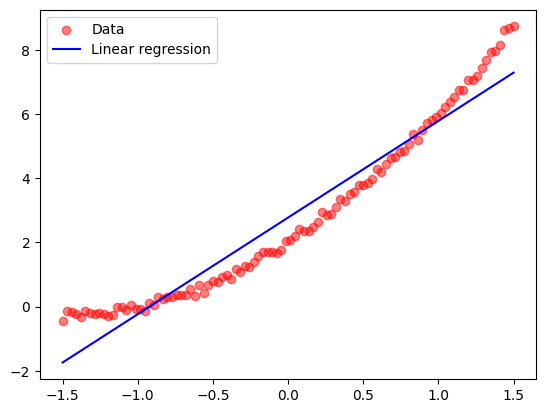

In [ ]:
# Plotting the results
plt.scatter(x, y, color='red', alpha=0.5, label='Data')
plt.plot(x, y_linear_regression, color='blue', label='Linear regression')
plt.legend()
plt.show()

Linear regressions are (unsurprisingly) can model the linear component but are unable to model the nonlinear second-order corrections.


#### Part 2: Transition to a simple Multilayer Perceptron with one hidden layer

**Introduction to MLP:**
An MLP is a class of feedforward artificial neural network (ANN). Unlike linear regression that directly maps input to output, MLPs have one or more hidden layers of neurons between inputs and outputs. Each neuron in the hidden layer transforms the inputs via a linear summation followed by a non-linear activation function.

**From Linear to MLP:**
To transform our linear model into an MLP, we add layers with non-linear activation functions. Each layer’s output becomes the subsequent layer’s input.

##### Adjusting to two-layer MLP in JAX:



Text(0, 0.5, 'ReLU(x)')

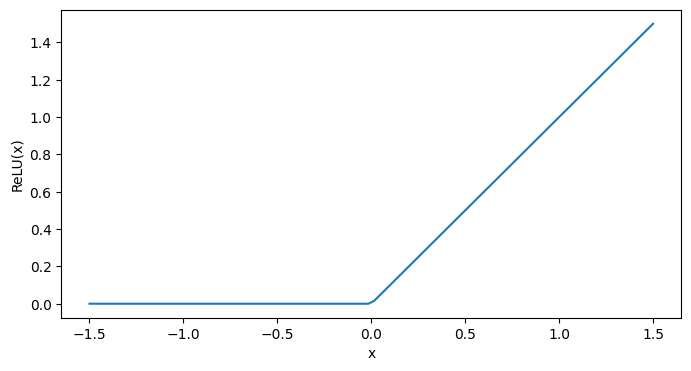

In [ ]:
# Additional imports
from jax.nn import relu

# Visualize ReLU
plt.figure(figsize=(8, 4))
plt.plot(x, relu(x))
plt.xlabel('x')
plt.ylabel('ReLU(x)')

In [ ]:
# Initialize more complex parameters
layer_size = 20
number_epochs = 1000
simple_mlp_params = {
    'w1': random.normal(key, (1, layer_size)),
    'b1': jnp.zeros(layer_size),
    'w2': random.normal(key, (layer_size, 1)),
    'b2': jnp.zeros(1)
}

# MLP prediction function
def simple_mlp_predict(params, x):
    hidden = relu(jnp.dot(x, params['w1']) + params['b1'])  # ReLU activation function
    return jnp.dot(hidden, params['w2']) + params['b2']

def simple_mlp_loss(*args):
    return loss(*args, predictor=simple_mlp_predict)

# Update function for MLP
def simple_mlp_update(params, x, y, learning_rate=0.01):
    gradients = grad(simple_mlp_loss)(params, x, y)
    return {k: v - learning_rate * gradients[k] for k, v in params.items()}

# Training loop for MLP
for _ in range(number_epochs):
    simple_mlp_params = simple_mlp_update(simple_mlp_params,
                                          x, y)

print("Trained MLP weights and biases:", simple_mlp_params)
y_simple_mlp = simple_mlp_predict(simple_mlp_params, x)

Trained MLP weights and biases: {'w1': Array([[ 0.48833865, -0.4568658 , -0.28026062, -0.01502904,  1.1164852 ,
        -0.88538957, -0.36989397, -0.14786364,  0.154538  ,  0.81861055,
        -0.48442772,  0.6535022 , -0.2396753 , -0.24810314,  0.23300497,
         0.48855287, -0.0411987 ,  0.36853674,  1.2302327 , -0.27445742]],      dtype=float32), 'b1': Array([ 0.05851207, -0.15179288, -0.09311654, -0.00499338,  0.13377638,
       -0.29417002, -0.12289695, -0.04912758,  0.01851661,  0.09808499,
       -0.16095042,  0.07830225, -0.07963183, -0.08243208,  0.02791843,
        0.05853784, -0.0136882 ,  0.04415768,  0.1474055 , -0.09118829],      dtype=float32), 'w2': Array([[ 0.47075063],
       [-0.46670285],
       [-0.28629398],
       [-0.01535266],
       [ 1.0762739 ],
       [-0.9044544 ],
       [-0.37785834],
       [-0.15104727],
       [ 0.14897218],
       [ 0.78912723],
       [-0.49485797],
       [ 0.6299671 ],
       [-0.24483638],
       [-0.2534451 ],
       [ 0.22461

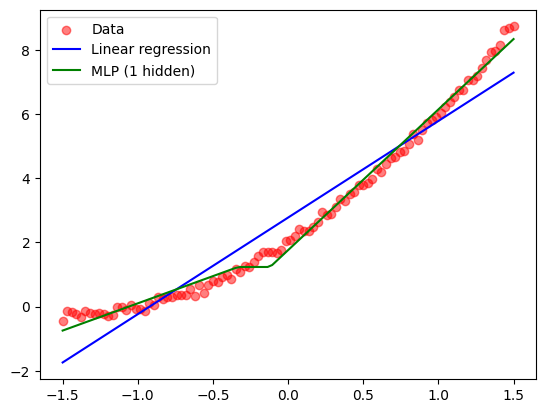

In [ ]:
# Plotting the results
plt.scatter(x, y, color='red', alpha=0.5, label='Data')
plt.plot(x, y_linear_regression, color='blue', label='Linear regression')
plt.plot(x, y_simple_mlp, color='green', label='MLP (1 hidden)')
plt.legend()
plt.show()



**Conclusion:**
This tutorial illustrated how to evolve a basic linear regression into an MLP. We started with a simple model and incrementally introduced the concepts of non-linearity and hidden layers, ending up with a neural network capable of capturing more complex patterns in the data. This progression not only enhances your understanding of both linear and neural networks.